In [4]:
# get the YOLO Moodel
from ultralytics import YOLO

# Load YOLOv8 Large (big model)
model = YOLO('yolov8l.pt')  # <-- large model


In [5]:
import os
os.getcwd()

'c:\\Studies\\projects_bkr\\test\\Car-Defects-Identifier'

In [6]:
import os
import yaml

# Get the current working directory
base_dir = os.getcwd()

# Construct absolute paths
data_yaml = {
    'train': os.path.join(base_dir, 'Data/train/images').replace('\\', '/'),
    'val': os.path.join(base_dir, 'Data/valid/images').replace('\\', '/'),
    'test': os.path.join(base_dir, 'Data/test/images').replace('\\', '/'),
    'nc': 7,
    'names': [
        "Crack", "Dent", "PDR-Dent", "Paint-Crack", 
        "Paint-fading", "Rust", "Scratch"
    ]
}

# Save to a temporary data.yaml file
with open("data_temp.yaml", "w") as f:
    yaml.dump(data_yaml, f)

print("✅ data_temp.yaml created successfully!")


✅ data_temp.yaml created successfully!


In [7]:
import os


# Train the model
results=model.train(
    data='data_temp.yaml',
    epochs=100,            # go up to 100
    batch=16,              # increase if GPU has room
    imgsz=640,
    patience=20,           # early stopping if it plateaus
    optimizer='SGD',       # good for defect datasets
    lr0=0.001,             # reduced starting learning rate
    lrf=0.01,              # lower final LR for better convergence
    weight_decay=0.0005,   # regularization

)


Ultralytics 8.3.105  Python-3.11.7 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-12450H)
engine\trainer: task=detect, mode=train, model=yolov8l.pt, data=data_temp.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None

train: Scanning C:\Studies\projects_bkr\test\Car-Defects-Identifier\Data\train\labels.cache... 342 images, 0 backgrounds, 0 corrupt: 100%|██████████| 342/342 [00:00<?, ?it/s]
val: Scanning C:\Studies\projects_bkr\test\Car-Defects-Identifier\Data\valid\labels.cache... 69 images, 0 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:00<?, ?it/s]


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train7
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/22 [00:05<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# use the  recent trained folder (train:) here and the best.pt modefile

model = YOLO('runs/detect/train2/weights/best.pt')


In [54]:
import requests
from PIL import Image




# Download the image from the URL
image_url = "https://media.istockphoto.com/id/1371062685/photo/driver-hand-examining-dented-car-with-damaged-fender-parked-on-city-street-side-road-safety.jpg?s=612x612&w=0&k=20&c=bN8obAwSs_ngOxU3EocKtIGG5bSvXVo1z4hQFrTKfxk="
response = requests.get(image_url, stream=True)
image = Image.open(response.raw)



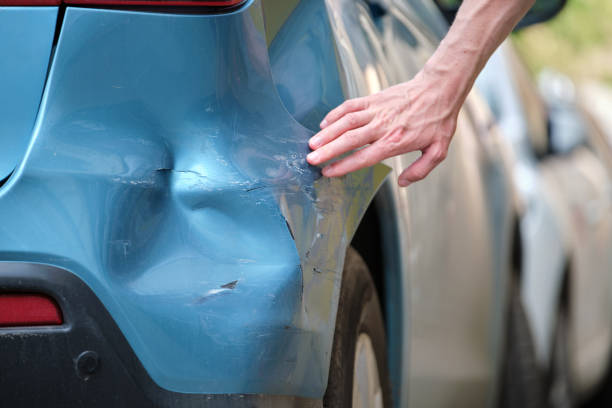

In [55]:
image


0: 448x640 1 Dent, 2 Scratchs, 49.7ms
Speed: 4.9ms preprocess, 49.7ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


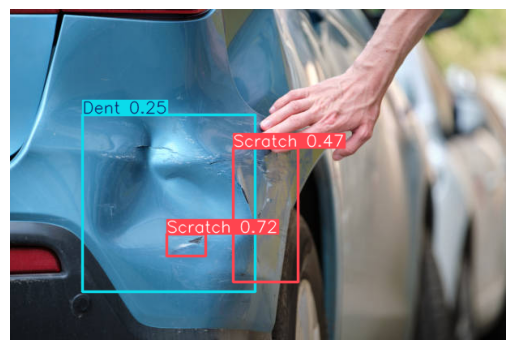

In [56]:
import matplotlib.pyplot as plt
import cv2


# Run inference on the image
results = model(image)

# Convert BGR to RGB before displaying
image_rgb = cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)

# Display the corrected image with Matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
